In [ ]:
# Codigos tomados de la pagina: 
# http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/

# Compuerta $X$

{'1': 495, '0': 505}


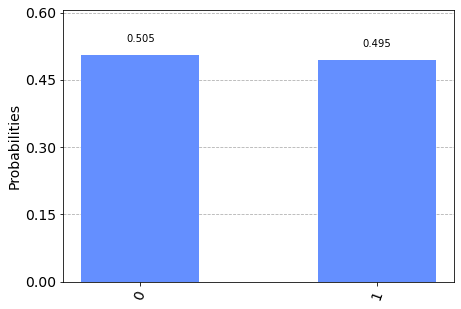

In [77]:
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector 
from qiskit.quantum_info import Statevector

# Creamos un circuito cuantico con un qubit y un bit clasico para codificar el resultado
qc = QuantumCircuit(1,1)

# Aplicamos la compuerta NOT sobre el qubit 0
qc.h(0)

# Medimos el qubit cuantico
qc.measure(0,0)

# Usamos el simulador de un computador cuantico llamado Aer
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(qc, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

Aplicando 2 veces la compuerta $X$

{'0': 1000}


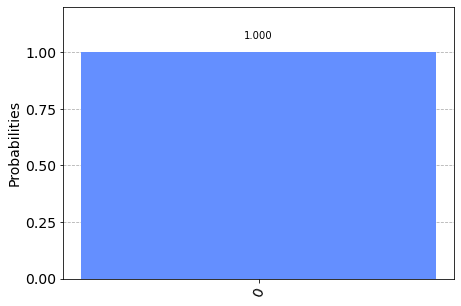

In [78]:
# Creamos un circuito cuantico con un qubit y un bit clasico para codificar el resultado
qc = QuantumCircuit(1,1)

# Aplicamos 2 veces la compuerta NOT sobre el qubit 0
qc.x(0)
qc.x(0)

# Medimos el qubit cuantico
qc.measure(0,0)

# Usamos el simulador de un computador cuantico llamado Aer
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(qc, backend, shots=1000)

# MOstramos los resultados de la ejecucion
results = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = results.get_counts()
print(counts)
plot_histogram(counts)

# Prediccion de la salida de los circuitos cuanticos

Prediccion de la salida de un Qubit

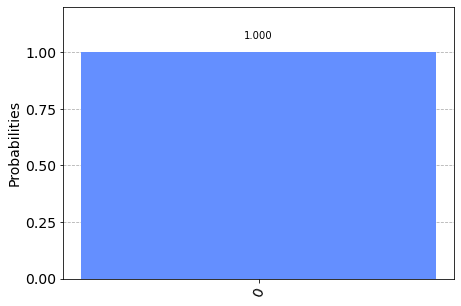

In [79]:
# Qubit en el estado |0> y posteriormente medido

circ = QuantumCircuit(1,1)
qc.measure(0,0)
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

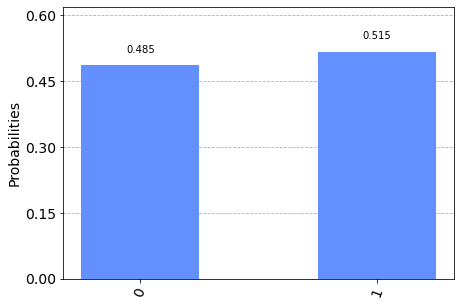

In [80]:
# Qubit en el estado |0>, luego aplicamos la compuerta Hadamard para obtener una 
# superposicion y luego lo medimos

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure(0,0)
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#  Prediccion de la salida de 2 Qubits

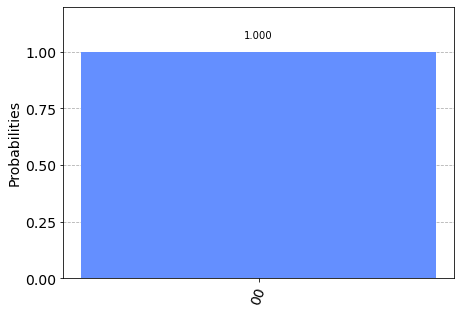

In [81]:
# Qubit en el estado |00> y posteriormente medido

qcirc = QuantumCircuit(2, 2)
qcirc.measure(range(2), range(2))

backend = Aer.get_backend("qasm_simulator")
job = execute(qcirc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

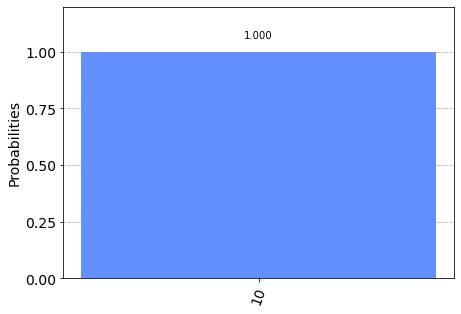

In [82]:
# Qubit en el estado |00>, luego aplicamos la compuerta X sobre el qubit y luego lo medimos

qcirc = QuantumCircuit(2, 2)
qcirc.x(1)
qcirc.measure(range(2), range(2))

backend = Aer.get_backend("qasm_simulator")
job = execute(qcirc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

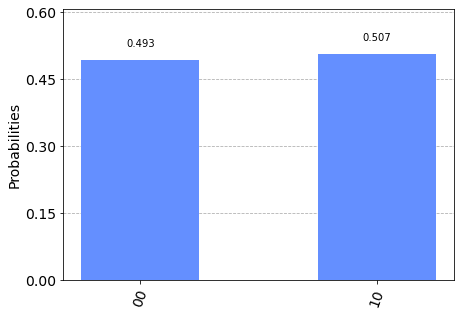

In [83]:
# Qubit en el estado |00>, luego aplicamos la compuerta H sobre el qubit y luego lo medimos

qcirc = QuantumCircuit(2, 2)
qcirc.h(1)
qcirc.measure(range(2), range(2))

backend = Aer.get_backend("qasm_simulator")
job = execute(qcirc, backend, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

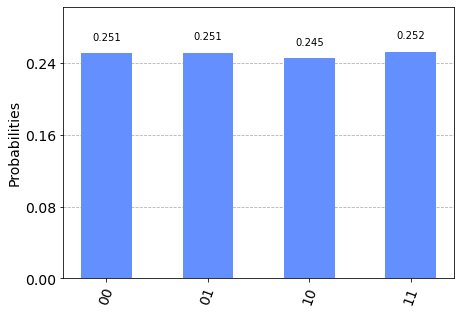

In [84]:
# Qubit en el estado |00>, luego aplicamos la compuerta H sobre los qubits y luego lo medimos

qcirc = QuantumCircuit(2, 2)
qcirc.h(0)
qcirc.h(1)
qcirc.measure(range(2), range(2))

backend = Aer.get_backend("qasm_simulator")
job = execute(qcirc, backend, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Prediccion para la salida de 3 Qubits

In [85]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(1)
qc.measure(range(3),range(3))

#backend = Aer.get_backend("qasm_simulator")
#job = execute(qcirc, backend, shots=10000)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'011': 484, '010': 516}


{'011': 12400, '111': 12510, '100': 12771, '110': 12625, '001': 12455, '101': 12417, '010': 12440, '000': 12382}


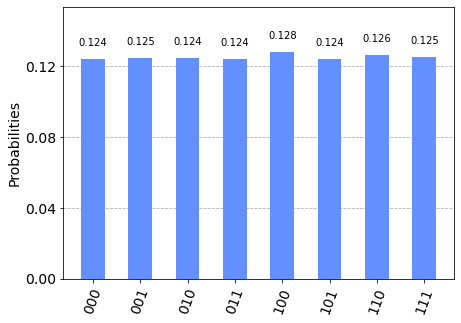

In [86]:
# Tres qubit en superposicion
qc = QuantumCircuit(3,3)
qc.h(range(3))
qc.measure(range(3),range(3))

#backend = Aer.get_backend("qasm_simulator")
#job = execute(qcirc, backend, shots=10000)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)
result = execute(qc, backend, shots=100000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

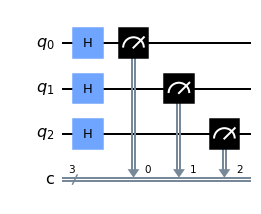

In [87]:
qc.draw("mpl")

{'1': 49878, '0': 50122}


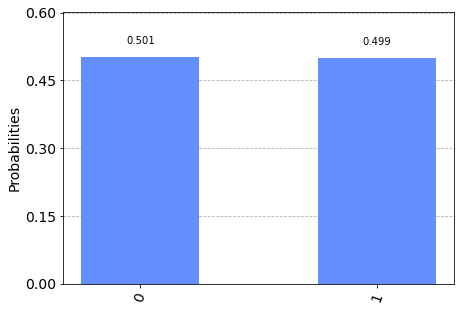

In [88]:
# Tres qubit en superposicion
qc = QuantumCircuit(1,1)
qc.h(0)
qc.y(0)
qc.save_statevector()
qc.measure(0,0)
#backend = Aer.get_backend("qasm_simulator")
#job = execute(qcirc, backend, shots=10000)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)
result = execute(qc, backend, shots=100000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

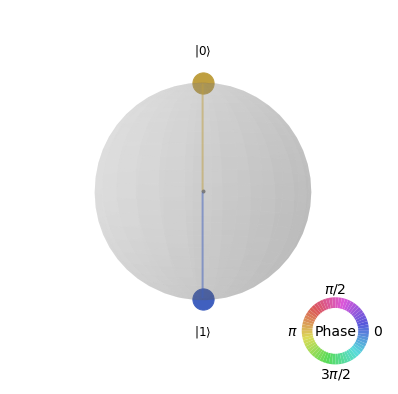

In [90]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)
state.draw('qsphere')

{'111': 50152, '011': 49848}


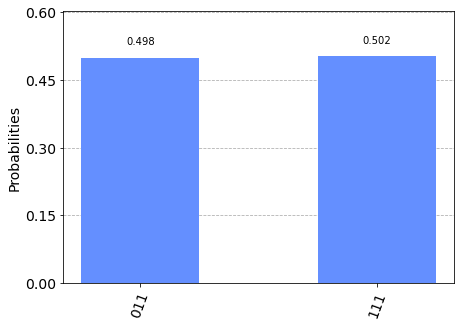

In [91]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.y(1)
qc.h(2)
qc.y(2)
qc.save_statevector()
qc.measure(range(3),range(3))

result = execute(qc, backend, shots=100000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

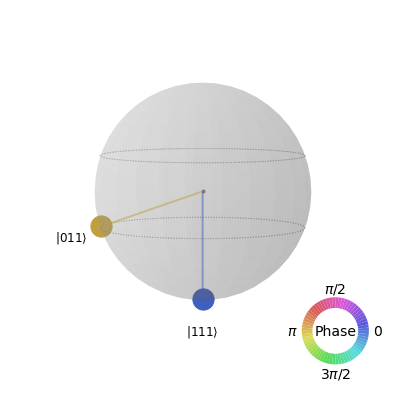

In [92]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)
state.draw('qsphere')

In [94]:
state.draw('latex')

<IPython.core.display.Latex object>

{'111': 100000}


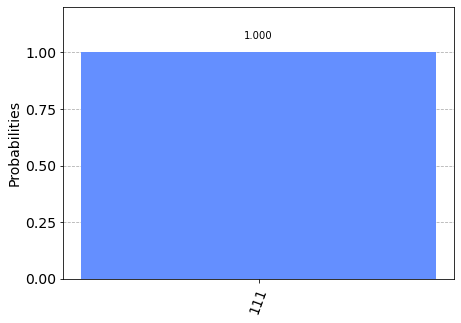

In [101]:
# Aplicacion de la compuerta Toffoli, la cual describe la misma accion de la compuerta AND

qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.measure(range(3),range(3))

result = execute(qc, backend, shots=100000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

Podemos escribir una funcion en Qiskit que realice la compuerta AND entre dos qubits

In [112]:
def AND(qb1, qb2):
    """
    Realiza la compuerta AND entre el qubit qb1 y el qubit qb2
    
    qc: circuito cuantico
    qb1: qubit 1
    qb2: qubit 2
    
    resultado: resultado de la operacion
    """
    qc = QuantumCircuit(3,1)
    #qb1 = 0
    #qb2 = 1
    qc.x(qb1)
    qc.x(qb2)
    qc.ccx(qb1, qb2, 2)
    qc.measure(2,0)
    
    resultado = execute(qc, backend, shots=100000).result()
    
    return print(resultado.get_counts())

    

In [114]:
def and_gate(a, b):
    """
    AND gate
    """
    qc = QuantumCircuit(3, 1)

    # Set up the registers
    if a:
        qc.x(0)
    if b:
        qc.x(1)

    qc.barrier()

    # AND
    qc.ccx(0, 1, 2)

    qc.barrier()

    # Measure
    qc.measure(2, 0)

    #print('Depth: {}'.format(qc.depth()))
    job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
    return job.result().get_counts()